# Loan Status Prediction

Importing the library

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score,confusion_matrix

Read The Dataset

In [2]:
# Loading the dataset
loan_df=pd.read_csv("O:/Projects/Loan Status Prediction/train_u6lujuX_CVtuZ9i (1).csv")
# Displaying the first few rows of the dataset
loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
# Checking the shape of the dataset
loan_df.shape

(614, 13)



1. **Gender**: Indicates the gender of the applicant.

2. **Married**: Specifies whether the applicant is married or not.

3. **Dependents**: Refers to the number of dependents (such as children, elderly parents) the applicant has. This helps assess the applicant's financial obligations and ability to repay the loan.

4. **Education**: Indicates the educational qualifications of the applicant. Education level can correlate with income and financial literacy, which are factors in loan eligibility.

5. **Self_Employed**: Indicates whether the applicant is self-employed or not. Self-employment status can affect the stability of income and may influence loan eligibility criteria.

6. **ApplicantIncome**: Represents the income of the primary applicant. This is a key factor in determining loan eligibility as it reflects the applicant's ability to repay the loan.

7. **CoapplicantIncome**: Represents the income of the co-applicant, if any. Co-applicant income can supplement the primary applicant's income and affect the total household income considered for loan eligibility.

8. **LoanAmount**: Denotes the amount of loan applied for by the applicant. This is the principal amount that the applicant is seeking to borrow.

9. **Loan_Amount_Term**: Specifies the term or duration of the loan in months. This is the period over which the loan is expected to be repaid.

10. **Credit_History**: Indicates the credit history of the applicant, whether they have a history of repaying debts on time. A positive credit history enhances loan eligibility, while a negative history may result in rejection.

11. **Property_Area**: Specifies the location or area where the applicant's property is located. Property location can impact loan eligibility due to factors such as property value and market conditions.

12. **Loan_Status**: Represents whether the loan application was approved or not. This is the target variable for prediction, based on the applicant's details and other factors, to determine loan eligibility.

Data Preprocessing

In [4]:
# Checking for missing values in the dataset
loan_df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
# Generating descriptive statistics for numerical columns
loan_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Handling missing values:

In [6]:
# Categorical columns with missing values are filled with the mode value of each column
categorical_col_with_nan = ['Gender', 'Married', 'Dependents', 'Self_Employed']
for col in categorical_col_with_nan:
    loan_df[col].fillna(loan_df[col].mode()[0], inplace=True)

# Numerical columns with missing values are filled with the mean value of each column
numerical_col_with_nan = ['LoanAmount', 'Loan_Amount_Term', 'Credit_History']
for col in numerical_col_with_nan:
    loan_df[col].fillna(loan_df[col].mean(), inplace=True)

In [7]:
#Rechecking for missing values and shape of the dataset after imputation
print(loan_df.isnull().sum())
print(loan_df.shape)

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64
(614, 13)


Data Visualization

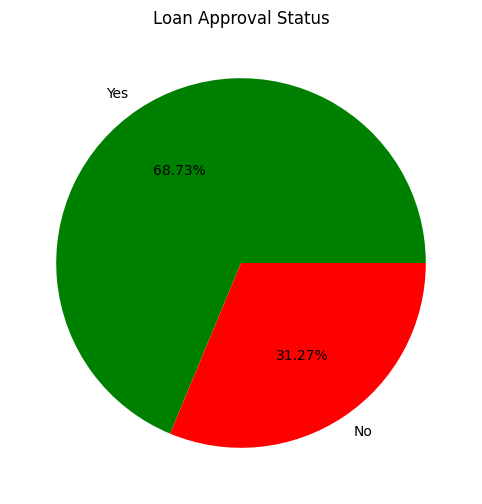

In [8]:
# Counting the number of loan approvals and rejections
people_approve_or_not = loan_df['Loan_Status'].value_counts()


# Plotting the pie chart
plt.figure(figsize=(8,6))
labels = ['Yes', 'No']
plt.pie(people_approve_or_not, labels=labels, colors=['Green','Red'], autopct='%1.2f%%')
plt.title('Loan Approval Status')
plt.show()


C:\Users\DEBANGA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 800x600 with 0 Axes>

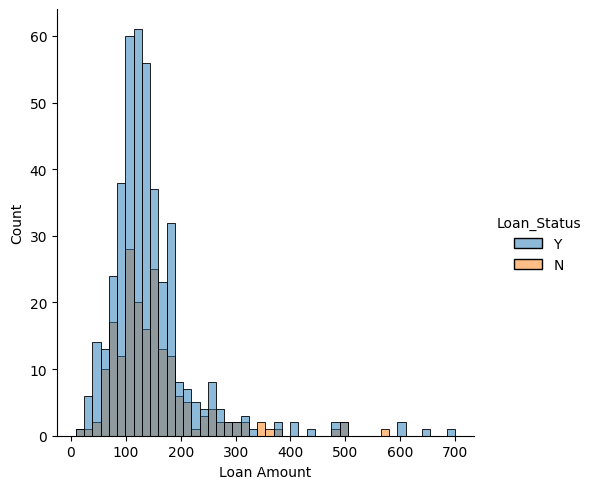

In [9]:
# Plotting a distribution plot for Loan Amount with hue based on Loan Status
plt.figure(figsize=(8,6))

sns.displot(x='LoanAmount',hue='Loan_Status',data=loan_df)
plt.xlabel('Loan Amount')
plt.ylabel('Count')
plt.show()

C:\Users\DEBANGA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 800x600 with 0 Axes>

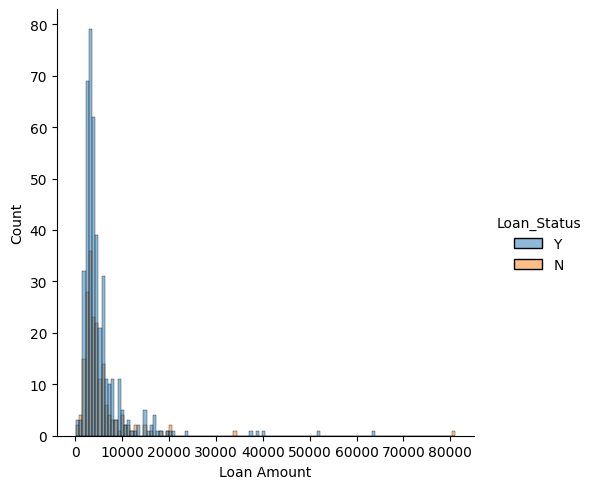

In [10]:
# Plotting a distribution plot for Applicant Income with hue based on Loan Status
plt.figure(figsize=(8,6))

sns.displot(x='ApplicantIncome',hue='Loan_Status',data=loan_df)
plt.xlabel('Loan Amount')
plt.ylabel('Count')
plt.show()

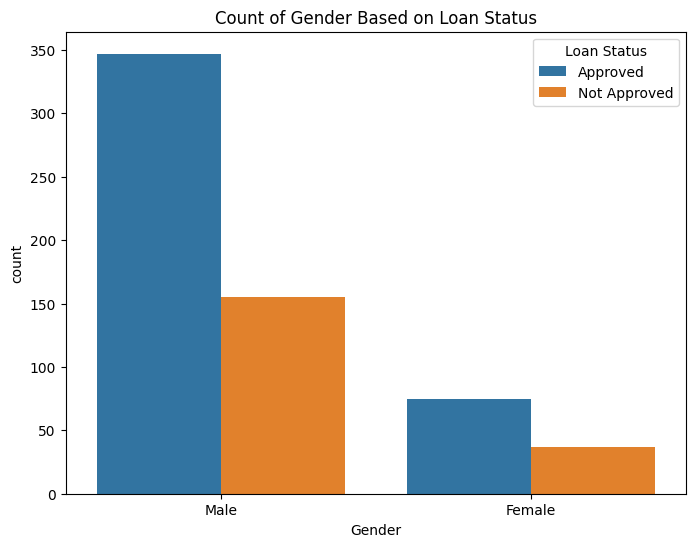

In [11]:
# Plotting a count plot for Gender with hue based on Loan Status
plt.figure(figsize=(8,6))

sns.countplot(x='Gender',hue='Loan_Status',data=loan_df)
plt.title("Count of Gender Based on Loan Status")
plt.legend(title='Loan Status', labels=['Approved', 'Not Approved'])
plt.show()

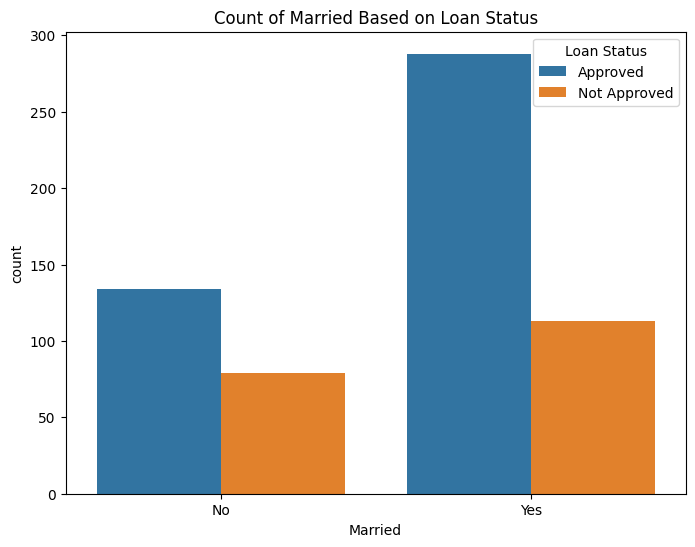

In [12]:
# Plotting a count plot for Married with hue based on Loan Status
plt.figure(figsize=(8,6))

sns.countplot(x='Married', hue='Loan_Status', data=loan_df)
plt.title("Count of Married Based on Loan Status")
plt.legend(title='Loan Status', labels=['Approved', 'Not Approved'])
plt.show()


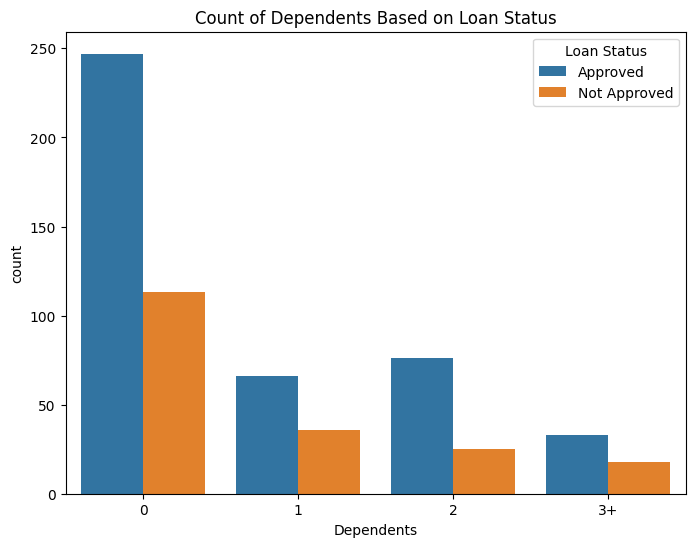

In [13]:
# Plotting a count plot for Dependents with hue based on Loan Status
plt.figure(figsize=(8,6))

sns.countplot(x='Dependents', hue='Loan_Status', data=loan_df)
plt.title("Count of Dependents Based on Loan Status")
plt.legend(title='Loan Status', labels=['Approved', 'Not Approved'])
plt.show()


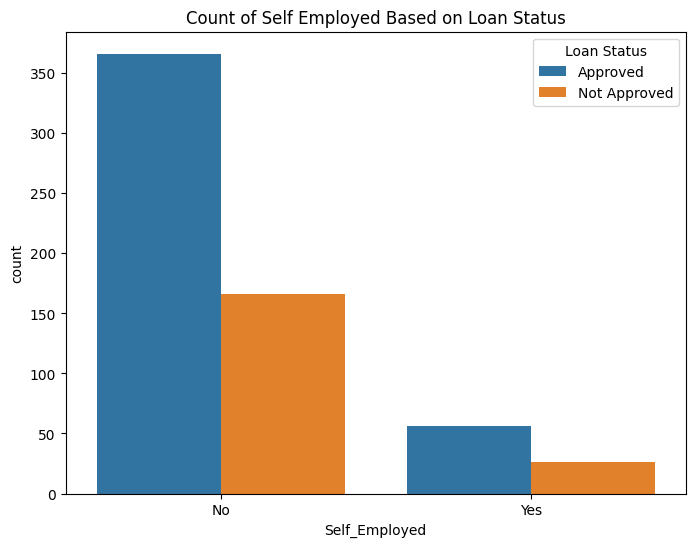

In [14]:
# Plotting a count plot for Self Employed with hue based on Loan Status
plt.figure(figsize=(8,6))

sns.countplot(x='Self_Employed', hue='Loan_Status', data=loan_df)
plt.title("Count of Self Employed Based on Loan Status")
plt.legend(title='Loan Status', labels=['Approved', 'Not Approved'])
plt.show()


In [15]:
loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


Converting the categorial valuesinto numeric values for machine learning model

In [16]:
# Replacing categorical values with numerical representations in the loan dataframe

loan_df.replace({'Gender':{'Male':1,'Female':0}},inplace=True)
loan_df.replace({'Married':{'Yes':1,'No':0}},inplace=True)
loan_df.replace({'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)
loan_df.replace({'Self_Employed':{'Yes':1,'No':0}},inplace=True)
loan_df.replace({'Property_Area':{'Rural':0,'Urban':2,'Semiurban':1}},inplace=True)
loan_df.replace({'Loan_Status':{'Y':1,'N':0}},inplace=True)

In [17]:
# Replacing 'Dependents' values with numerical representation
loan_df['Dependents'].replace(to_replace='3+',value=4,inplace=True)

In [18]:
# Checking the counts of 'Dependents' values after replacement
loan_df['Dependents'].value_counts()

Dependents
0    360
1    102
2    101
4     51
Name: count, dtype: int64

In [19]:
# Displaying the first few rows of the loan dataframe after replacement
loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1


Separate independent and dependent variables

In [20]:
# Separating features (x) and target (y) from the loan dataframe
x=loan_df.drop(['Loan_ID','Loan_Status'],axis=1)
y=loan_df['Loan_Status']

In [21]:
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2
1,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0
2,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2
3,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2
4,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2


In [22]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

Spliting dataset in training data and testing data

In [23]:
# Splitting the dataset into training and testing sets with a test size of 20%
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=2)

print(x.shape,X_train.shape,X_test.shape)

(614, 11) (491, 11) (123, 11)


Training The Model:





Support Vector Machine Model for Classification

In [24]:
# Making predictions on the training set using the trained classifier
classifier=svm.SVC(kernel='linear')

# Training the model
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

Model Evaluation



Accuracy on training data

In [25]:
# Calculating the accuracy of the model on the training data
X_train_predition=classifier.predict(X_train)
training_accuracy=accuracy_score(X_train_predition,Y_train)
 
print('Accuracy on training data:',training_accuracy*100)

Accuracy on training data: 79.63340122199592


***Model is not overfitted***

Model Evaluation



Accuracy on testing data

In [26]:
# Calculating the accuracy of the model on the testing data
X_test_predition=classifier.predict(X_test)
testing_accuracy=accuracy_score(X_test_predition,Y_test)

print('Accuracy on training data:',testing_accuracy*100)

Accuracy on training data: 80.48780487804879


In [27]:
cm_testing=confusion_matrix(X_test_predition,Y_test)

cm_testing

array([[17,  3],
       [21, 82]], dtype=int64)

In [29]:
# Save the model
import pickle
model_filename = 'O:/Projects/Loan Status Prediction/trained_Loan_Status_Prediction_model.sav'
pickle.dump(classifier, open(model_filename, 'wb'))

**Making a Predict System**

In [28]:
# Male-1,	Yes- 1,	1,	Graduate-1	No-0,	5649,	0,	44,	360,	1,	Urban-2

# Defining input data for prediction
input_data = (1, 1, 1, 1, 0, 5649, 0, 44, 360, 1, 2)

# Changing the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshaping the numpy array as we are predicting for one instance or example
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# Making predictions on the input data
prediction = classifier.predict(input_data_reshaped)
print(prediction)

# Checking the prediction and providing an appropriate message
if prediction[0] == 0:
    print('The person is not eligible for a loan.')
else:
    print('The person is eligible for a loan.')


[1]
The person is eligible for a loan.


C:\Users\DEBANGA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
